In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Loading the Dataset

In [2]:
# Load the dataset

data = pd.read_csv("/kaggle/input/my-real-estate-model/Real estate.csv")

# Display the first few rows and basic info of the dataset to understand its structure
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


## Data Pre- Processing

In [12]:
# Select relevant features and target variable
X = data[['X2 house age', 'X3 distance to the nearest MRT station', 
          'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = data['Y house price of unit area']


X

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381
410,5.6,90.45606,9,24.97433,121.54310
411,18.8,390.96960,7,24.97923,121.53986
412,8.1,104.81010,5,24.96674,121.54067


## Splitting the Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Model

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Making Predictions (Testing the Model)

In [9]:
y_pred = model.predict(X_test)
y_pred

array([47.74180481, 41.95484652, 44.5399885 , 41.33697932, 30.28548   ,
       42.84474934, 45.98717123, 45.90599326, 24.78369465, 52.02068924,
       32.23880597, 34.77542016, 39.51392044, 24.90203898, 35.73984968,
       32.99552705, 41.96863217, 46.98662328, 31.50100311, 44.49258341,
        2.21362693, 33.64381059, 47.764103  , 43.56374399, 14.07301949,
       41.29883092, 14.73315281, 44.5399885 , 36.13972668, 37.76019401,
       11.66211419, 39.22848089, 37.83881729, 28.61334713, 45.93500741,
       31.52925298, 52.2101045 , 15.18188713, 46.84531477, 40.47464938,
       36.01694465, 40.58052131, 48.38869976, 39.8943259 , 42.00896517,
       48.22742934, 45.07252677, 23.5290158 , 49.9849698 , 48.13933326,
       47.74180481, 48.54209921, 40.94754085, 42.54642454, 36.38766353,
       15.15482781, 35.13348041, 36.39866246, 30.20430203, 45.90599326,
       33.69672647, 32.65567761, 15.15482781, 11.8739673 ,  8.74877596,
       33.67086991, 29.81801432, 45.24751413, 34.2425491 , 30.54

## Model Evaluation

In [7]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

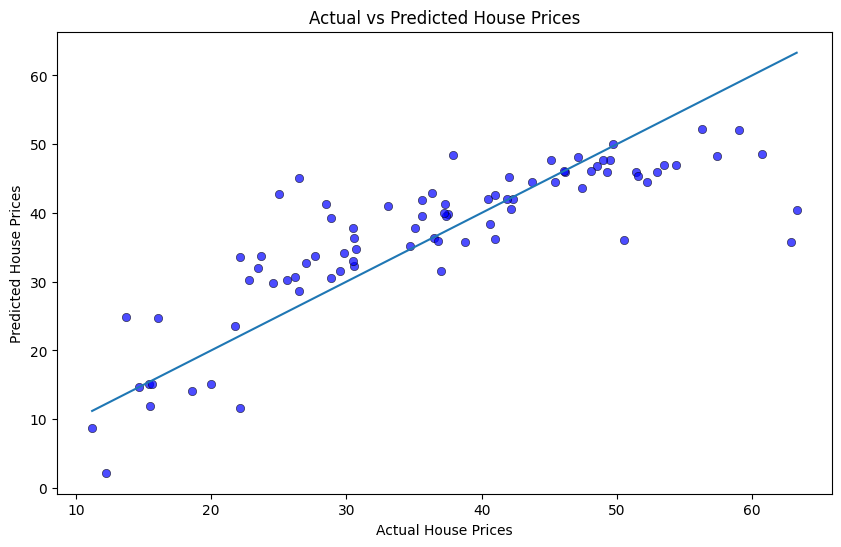

In [8]:
# Plotting the actual vs predicted house prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='b', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])  # Line for perfect prediction
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()